# 3강. 데이터 다루기
- 도미의 크기 계산
- if fish_length >= 30:<br>
 　print("도미")

### 키워드
- 2개의 클래스(class)
- 분류 (classification)
- 이진 분류 (binary classification)
    - 양성: 1
    - 음성: 0

# 사전준비

In [1]:
# 기본적인 패키지부터 추가
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글/차트 마이너스 없애기
from matplotlib import rc

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

## 데이터 로드 & 확인
- 참조링크
    - [Kaggle](https://www.kaggle.com/datasets/aungpyaeap/fish-market)
    - [Github](https://gist.github.com/rickiepark)

### 데이터 로드
- 행: 샘플
- 열: 데이터

- Bream(도미) 데이터
    - 데이터 개수 : 35개 리스트 2개
        - 길이, 무게 각각의 특성 존재
    - 특징(feature) : 대략 30cm보다 길다.

In [3]:

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

- Smelt(빙어) 데이터
    - 데이터 개수 : 14개

In [4]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

### 산점도(Scatter Plot)

- 빙어와 도미 데이터로 상관관계 확인

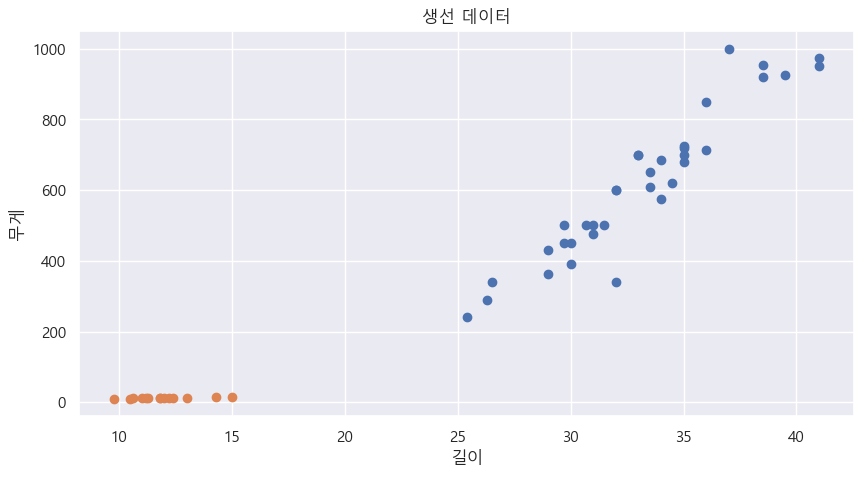

In [5]:
plt.figure(figsize=(10,5)) # 차트 크기지정
plt.scatter(x=bream_length, y=bream_weight) # 도미
plt.scatter(x=smelt_length, y=smelt_length) # 빙어
# scatter 연달아 넣으면 알아서 색 다르게 보여줌
plt.title('생선 데이터')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

## 전처리

### 도미/빙어 데이터 결합
- 도미, 빙어 연달아 연결함

In [6]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

In [7]:
type(fish_length)

list

In [8]:
print(fish_length)
print(fish_weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


1차원 리스트 2개 -> 2차원 리스트 변경
- 사이킷런이 기대하는 데이터 형태
- list / df / numpy, array list

In [9]:
# 리스트 내포(comprehension) + zip
# 길이, 무게를 묶어서 l, w에 할당하고 fish_data리스트 안에 [l, w] 추가
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [10]:
df = pd.DataFrame(fish_data)
df.head()

,0,1
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


데이터프레임으로 seaborn에서 산점도 그리기

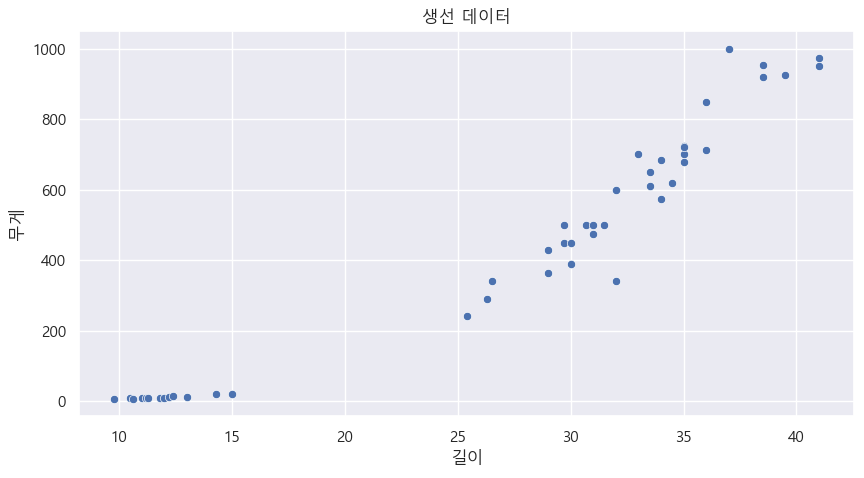

In [11]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=df, x=0, y=1)
plt.title('생선 데이터')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

# 모델 학습

## k-최근접 이웃 알고리즘 <br>(KNN; K-Nearst Neighbors)
- 가장 쉬운 모델, 많이 쓰이진 않음
- 모듈: sklearn.neighbors
- 클래스: KNeighborsClassifier
- 모델: kn
- method
    - 모델 훈련: fit
    - 정확도 확인: score

In [12]:
from sklearn.neighbors import KNeighborsClassifier

### 정답 준비 -> 지도 학습
- 1은 Bream도미(도미를 찾는 문제), 0은 Smelt 빙어
- 원핫인코딩?

In [13]:
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
# 트레이닝
kn = KNeighborsClassifier() # 클래스에 ()를 붙여서 객체를 만든다
kn.fit(X=fish_data, y=fish_target)

KNeighborsClassifier()

In [15]:
# 정확도 확인 : 1.0 = 100%
kn.score(X=fish_data, y=fish_target)

1.0

### 예측하기 (새로운 생선)
- KNN: 샘플 주위의 5개(기본값) 샘플을 보고 예측
- method
    - 예측: predict

In [16]:
# 1 = 도미, 0 = 빙어
kn.predict([[30, 600]])
# 결과: 도미 100%

array([1])

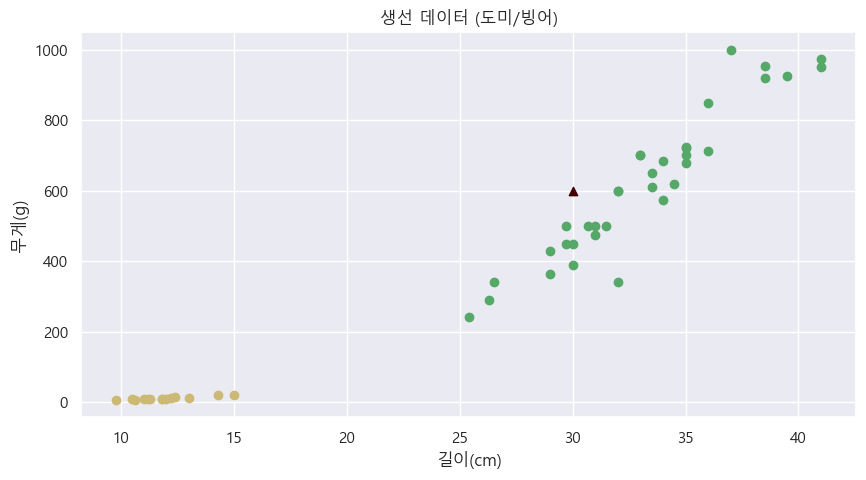

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(x=bream_length, y=bream_weight, color='g')
plt.scatter(x=smelt_length, y=smelt_weight, color='y')
# 의문의 물고기 하나 추가
plt.scatter(x=30.0, y=600.0, marker='^', color='#430000')
plt.title('생선 데이터 (도미/빙어)')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

#### 예측시 주변 샘플 값 몇 개 할 지 중요
최근접으로 사용하는 샘플 개수 기본값 5개
- 최근접 값으로 쓸 파라미터: 49개
    -  : 전체 샘플과 비교 (35/49: 0.7142857142857143)<br><br>
- 최근접 값으로 쓸 파라미터: 40개

In [18]:
kn20 = KNeighborsClassifier(n_neighbors=20)

In [19]:
kn20.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=20)

In [20]:
kn20.score(fish_data, fish_target)
# 1.0 -> 0.9795918367346939

0.9795918367346939

In [21]:
# 전체 중 도미일 확률
print(35/49)

0.7142857142857143


#### TODO 추가사항

In [22]:
# 훈련했던 데이터 그대로
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [23]:
# 훈련했던 타겟값 그대로
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
